# THE SPARKS FOUNDATION

## Task 2 - Prediction using Unsupervised Machine Learning

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

### Author - Vaibhav Channe

In [1]:
# Importing required liabraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

#### Loading the Iris Dataset into the notebook

In [2]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris = datasets.load_iris()
data1 = pd.DataFrame(iris.data,columns=iris.feature_names)
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [6]:
data1.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

##### Univariate Analysis

C:\Users\Vaibhav Channe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


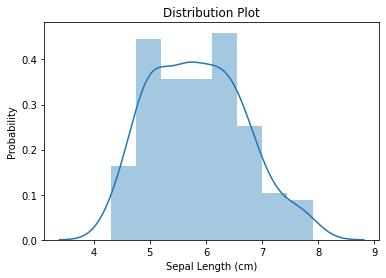

In [7]:
sns.distplot(data1["sepal length (cm)"])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Probability")
plt.title("Distribution Plot")
plt.show()

C:\Users\Vaibhav Channe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


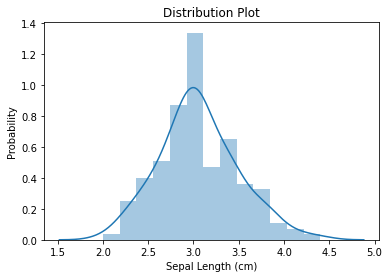

In [8]:
sns.distplot(data1["sepal width (cm)"])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Probability")
plt.title("Distribution Plot")
plt.show()

##### Multivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

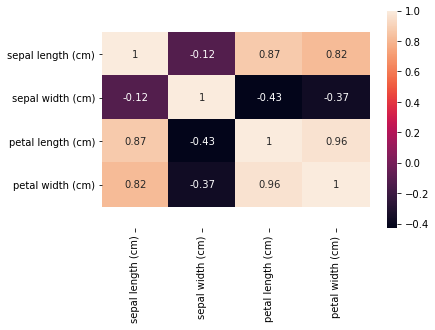

In [9]:
map = sns.heatmap(data1.corr(),annot = True)
bottom,top = map.get_ylim()
map.set_ylim(bottom+0.5, top-0.5)
plt.show

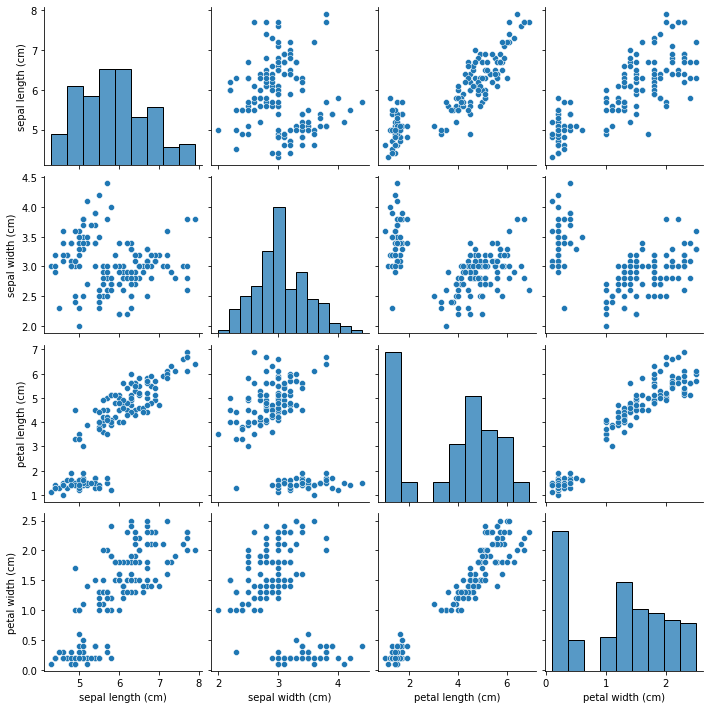

In [11]:
sns.pairplot(data1)
plt.show()

### How do you find the optimum number of clusters for K-Means?                                                                                             How does one determine the value of K?

In [12]:
x=data1.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for  i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                 max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

C:\Users\Vaibhav Channe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


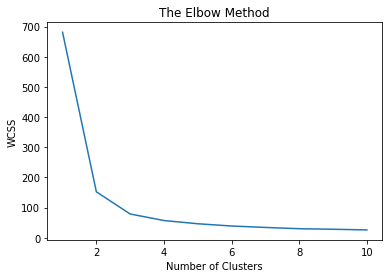

In [13]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Creating K-Means Classifier

In [14]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualizing the cluster data

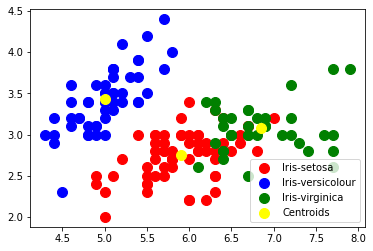

In [15]:
# Visualizing the clusters-On the first two columns
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

## || END OF CODE ||